#  Project1_TF-IDF +Visualization

運用TF-IDF的方式分析文檔，並用視覺化的方式呈現，並探討相關的問題。

# 前言
本人非常討厭社會科，在考學測的時候，賽對了很多提，於是想藉由統計的方式，教教莘莘學子該猜什麼答案

### 目標
1. 統計出近20年學測社會科常用的字
2. 尋找這些字和答案的關系
3. 預測明年試題方向

### 程式



In [27]:
import jieba
import sys

創建一個函數，可以自動抓取資料夾中的.txt檔，除去掉一些無關的字後，轉換成文字輸出

In [28]:
def openfile(filePath):
    paragraph=""
    with open(filePath,encoding = 'utf8') as f:
        for ele in f:
            ele=ele.replace(" ","").replace("1","").replace("2","").replace("3","").replace("4","").replace("5","").replace("6","").replace("7","").replace("8","").replace("9","").replace("0","").replace("(A)","").replace("(B)","").replace("(C)","").replace("(D)","").replace("，","").replace("。","")
            ele=ele.strip()
            paragraph+=ele
        return paragraph

用jieba.cut切出不同的詞，以間格為空格的方式輸出

In [29]:
def cutParagraph(uncuted):
    result = []
    file_list=uncuted
    seg_list = jieba.cut(file_list,cut_all=True)
    for seg in seg_list :
        seg = ''.join(seg.split())
        result.append(seg)
    a=" ".join(result)
    return a

In [31]:
corpus=[]
import glob, os
for file in glob.glob("*.txt"):
    txt=openfile(file)
    corpus.append(cutParagraph(txt))    

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction
import operator

vectorizer = CountVectorizer()
transformer=TfidfTransformer()
X = transformer.fit_transform(vectorizer.fit_transform(corpus))
X.toarray()           
word=vectorizer.get_feature_names()#获取词袋模型中的所有词语  
weight=X.toarray()#将tf-idf矩阵抽取出来，元素a[i][j]表示j词在i类文本中的tf-idf权重
ls=[]
for i in range(len(weight)):#打印每类文本的tf-idf词语权重，第一个for遍历所有文本，第二个for便利某一类文本下的词语权重  
    dic={}
    print(u"-------这里输出第",i,u"类文本的词语tf-idf权重------")
    for j in range(len(word)):
        if weight[i][j]>0.06:
            dic[word[j]]=weight[i][j]
            print(word[j],weight[i][j])
    sorted_dic = sorted(dic.items(), key=operator.itemgetter(1))
    ls.append(sorted_dic)

-------这里输出第 0 类文本的词语tf-idf权重------
下列 0.252708444848
世界 0.0649821715325
人口 0.101083377939
何者 0.129964343065
侵害 0.0780923538741
公斤 0.275673936891
公路 0.0858123908638
分布 0.0722024128138
分析 0.106137808877
北半球 0.0624738830993
半球 0.0715103257198
可能 0.166065549472
妹妹 0.111171554714
孝文帝 0.0667029328285
政府 0.122744101784
政治 0.0866428953766
教育 0.0922346997113
旅行者 0.0667029328285
日本 0.144404825628
晴天 0.0667029328285
有罪 0.0689184842228
民法 0.0715103257198
水量 0.0742964662137
照片 0.0743790020545
爸爸 0.0667029328285
程度 0.0959139235406
耗水 0.1556401766
耗水量 0.1556401766
自我 0.122249311685
行者 0.0667029328285
路段 0.133405865657
都市 0.161410724495
雨天 0.0889372437714
需求 0.073659331393
需求量 0.0965337751556
高等 0.103377726334
高等教育 0.115840530187
-------这里输出第 1 类文本的词语tf-idf权重------
cd 0.0658099966012
一定 0.0979274651058
下列 0.206583983449
不一 0.0673334483662
丙丁 0.0997301989064
主政 0.0733018771689
主要 0.0926066132702
乙丙 0.0926066132702
乙方 0.0877466621349
人口 0.0783594419979
人次 0.0658099966012
人民 0.085483027634
何者 0.12822454

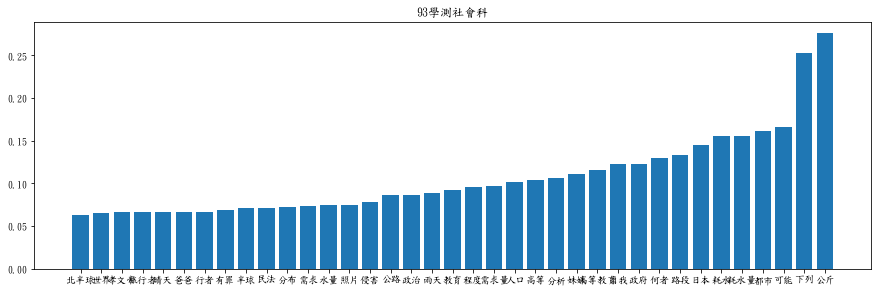

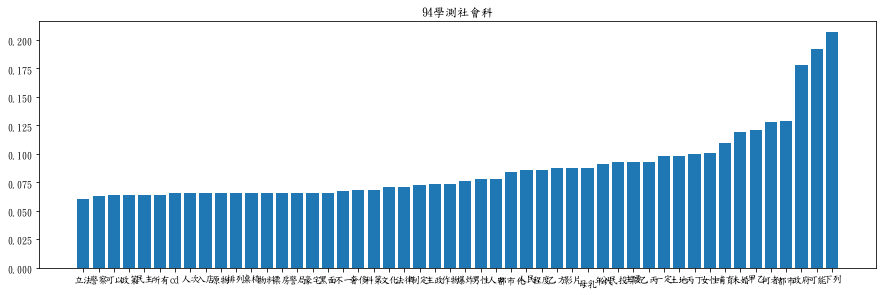

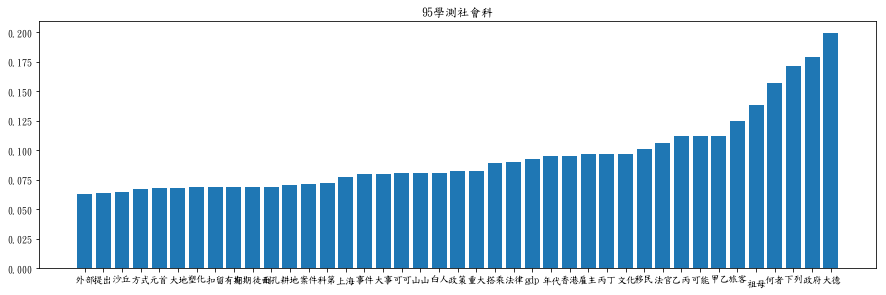

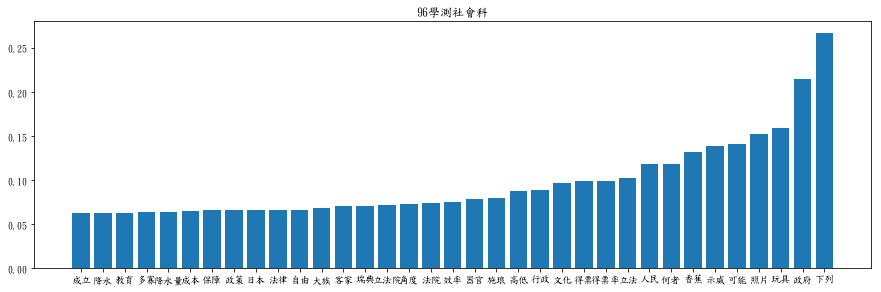

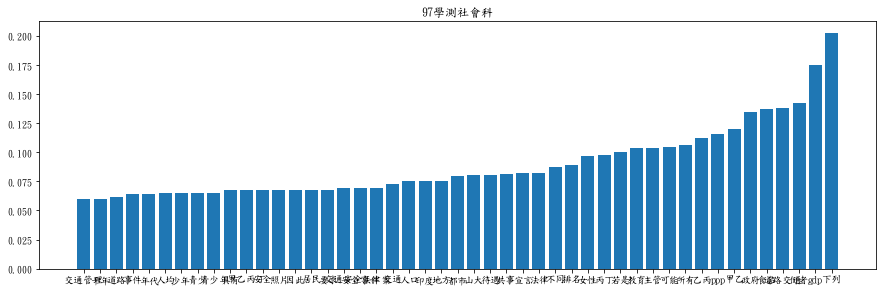

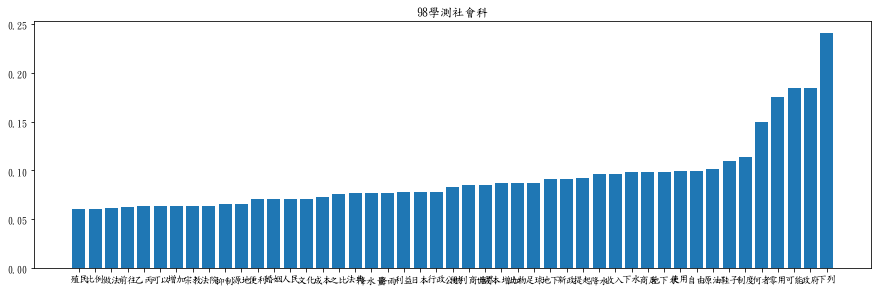

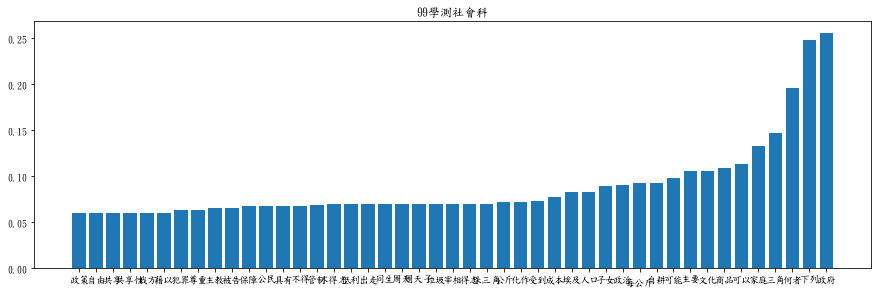

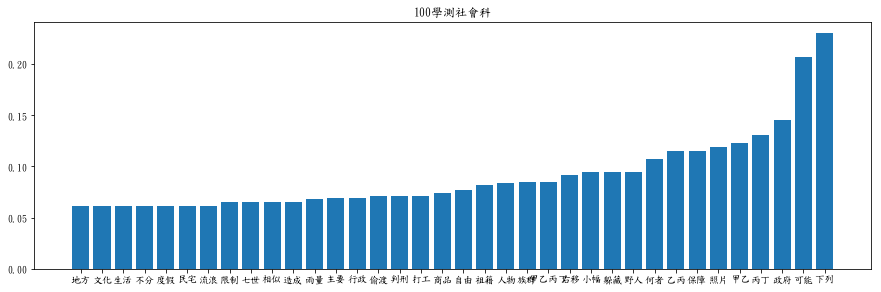

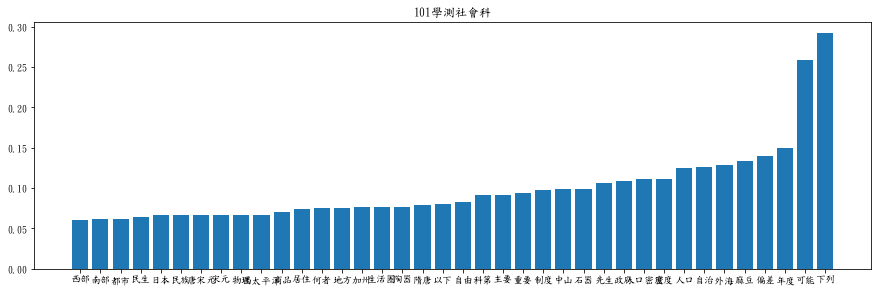

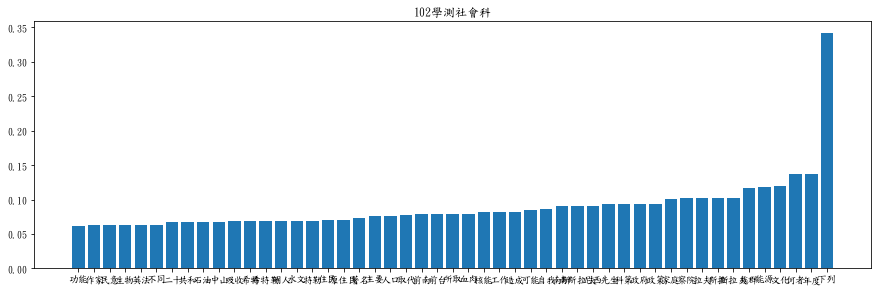

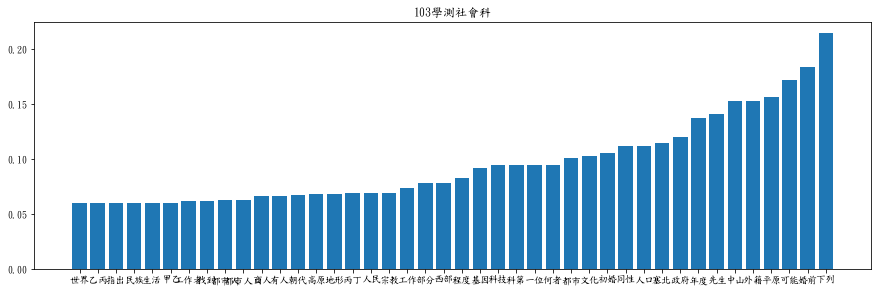

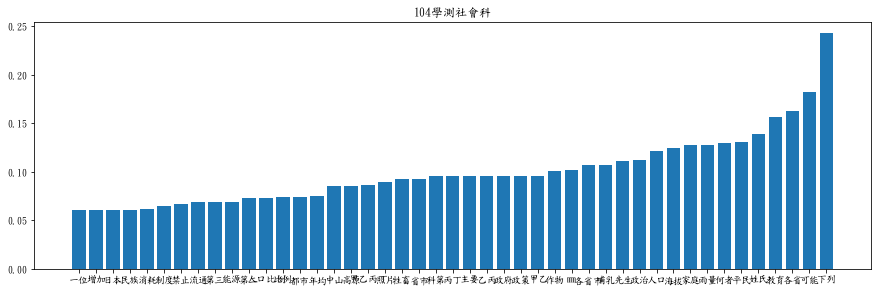

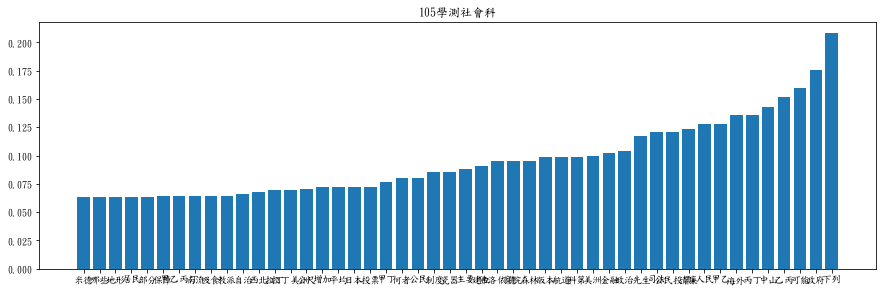

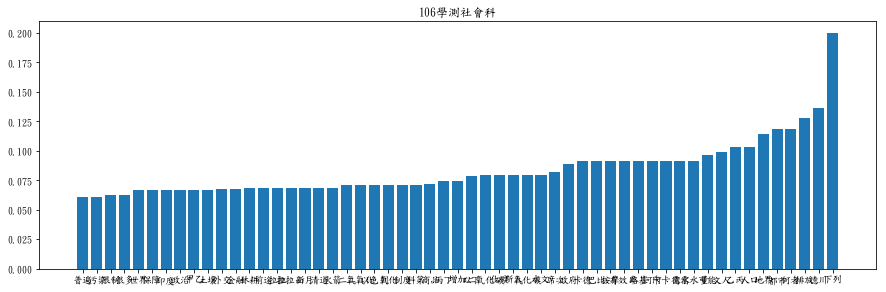

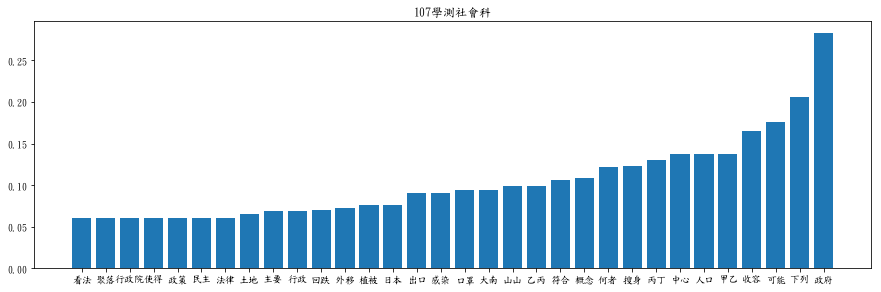

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

plt.rcParams["figure.figsize"] =[15,10]
for index,ele in enumerate(ls):
    ordered_dic=OrderedDict(ls[index])
    plt.subplot(211)
    xticks = np.arange(len(ordered_dic)) + 1
    plt.bar(xticks, ordered_dic.values(), align='center')
    plt.xticks(xticks, list(ordered_dic.keys()))
    plt.title(str(93+index)+"學測社會科")
    plt.show()

以上是分析的結果，圖中顯示tf-idf词语权重>0.06的詞語，可以看出分布蠻平均的，可以看出每年幾乎都會有不同的詞語出現，代表有好好出題！，接下來分析甚麼樣的敘述容易被當成答案

先將所有的選項儲存在matrix當中，此matrix為 (題數)X(選項數) 的矩陣，並把答案做成一個dictionary，將會是題目為key，答案為value的形式，無答案或是兩個選項的接不考慮，交叉比對後，可以得到正確答案，大考中心給的答案形式很不統一 = =，94另外做，再經由答案的dictionary 和選項的matrix做交叉比對，可以得出正確答案的選項

In [58]:
ans=[]
for i in range(93,108):
    with open(str(i)+".txt",encoding = 'utf8') as f:
        choice_matric=[]
        count=0
        for ele in f:
            if "(A)" in ele or "(B)" in ele or "(C)" in ele or "(D)" in ele:
                if count%4==0:
                    choice_list=[]
                ele=ele.replace("(A)","").replace("(B)","").replace("(C)","").replace("(D)","").replace(" ","").strip()
                choice_list.append(ele)
                if count%4==3:
                    choice_matric.append(choice_list)
                count+=1
#         print(choice_matric)
    with open("./ans/"+str(i)+"A.txt",encoding = 'utf8') as f:
        if i !=94:
            ans_dic={}
            for ele in f:
                try:
                    key=int(ele)
                    ans_dic[key]=""
                except:
                    temp=ele.lower()
                    if ele!=temp:
                        ele=ele.strip('\n')
                        if ele=="A":
                            ans_dic[key]=1
                        if ele=="B":
                            ans_dic[key]=2
                        if ele=="C":
                            ans_dic[key]=3
                        if ele=="D":
                            ans_dic[key]=4
        else:
            ans_dic={}
            o=1
            for ele in f:
                ele=ele.strip('\n')
                print(ele)
                if ele=="A":
                    ans_dic[o]=1
                    o+=1
                elif ele=="B":
                    ans_dic[o]=2
                    o+=1
                elif ele=="C":
                    ans_dic[o]=3
                    o+=1
                elif ele=="D":
                    ans_dic[o]=4
                    o+=1
                else:
                    continue
            print(ans_dic)
            print(len(ans_dic))
    final_ans=""
    for j in range(len(ans_dic)):
#         print(j)
        try:
            final_ans+=choice_matric[j][ans_dic[j+1]-1]+" "
        except:
            pass
    ans.append(final_ans)
print(o)

﻿B
A
B
A
C
C
B
D
C
B
D
B
C
D
B
D
C
B
B
D
C
A
B
C
C
A
C
D
B
C
C
A
B
B
C
B
A
D
C
A
D
A
D
D
B
B
A
C
B
C
C
D
D
D
A
C
B
B
D
A
D
B
D
D
A
D
D
C
B
C
D
D


{1: 1, 2: 2, 3: 1, 4: 3, 5: 3, 6: 2, 7: 4, 8: 3, 9: 2, 10: 4, 11: 2, 12: 3, 13: 4, 14: 2, 15: 4, 16: 3, 17: 2, 18: 2, 19: 4, 20: 3, 21: 1, 22: 2, 23: 3, 24: 3, 25: 1, 26: 3, 27: 4, 28: 2, 29: 3, 30: 3, 31: 1, 32: 2, 33: 2, 34: 3, 35: 2, 36: 1, 37: 4, 38: 3, 39: 1, 40: 4, 41: 1, 42: 4, 43: 4, 44: 2, 45: 2, 46: 1, 47: 3, 48: 2, 49: 3, 50: 3, 51: 4, 52: 4, 53: 4, 54: 1, 55: 3, 56: 2, 57: 2, 58: 4, 59: 1, 60: 4, 61: 2, 62: 4, 63: 4, 64: 1, 65: 4, 66: 4, 67: 3, 68: 2, 69: 3, 70: 4, 71: 4}
71
72


94 年的真的很煩

In [59]:
corpus=[]
for i in range(len(ans)):
    corpus.append(cutParagraph(ans[i]))  

In [60]:
final_ans=[]
for i in range(len(ans_dic)):
    final_ans.append(choice_matric[i][ans_dic[i+1]-1])

In [61]:
Y = transformer.fit_transform(vectorizer.fit_transform(corpus))
Y.toarray()           
word=vectorizer.get_feature_names()#获取词袋模型中的所有词语  
weight=Y.toarray()#将tf-idf矩阵抽取出来，元素a[i][j]表示j词在i类文本中的tf-idf权重
ls=[]
for i in range(len(weight)):#打印每类文本的tf-idf词语权重，第一个for遍历所有文本，第二个for便利某一类文本下的词语权重  
    dic={}
    print(u"-------这里输出第",i,u"类文本的词语tf-idf权重------")
    for j in range(len(word)):
        if weight[i][j]>0.01:
            dic[word[j]]=weight[i][j]
            print(word[j],weight[i][j])
    sorted_dic = sorted(dic.items(), key=operator.itemgetter(1))
    ls.append(sorted_dic)

-------这里输出第 0 类文本的词语tf-idf权重------
1821 0.091945131607
1880 0.0798388642132
1894 0.091945131607
1910 0.091945131607
1929 0.091945131607
1937 0.0798388642132
400 0.0798388642132
下降 0.142498661602
不信 0.091945131607
不能 0.091945131607
世界 0.0438909702699
中日 0.091945131607
中晚期 0.091945131607
主政 0.091945131607
主流 0.0798388642132
二次 0.159677728426
人身 0.091945131607
人身自由 0.091945131607
以求 0.091945131607
住址 0.091945131607
作物 0.091945131607
保障 0.0545404741548
信任 0.091945131607
信任投票 0.091945131607
信用 0.091945131607
修正 0.0798388642132
修正案 0.0798388642132
偏差 0.091945131607
先生 0.091945131607
入侵 0.091945131607
公厘 0.091945131607
公羊 0.091945131607
共和 0.0645867710757
共有 0.091945131607
其他 0.0712493308012
其他支出 0.091945131607
出售 0.0798388642132
分配 0.0798388642132
刊登 0.091945131607
初年 0.0798388642132
刺激 0.091945131607
削弱 0.091945131607
加入 0.0712493308012
化工 0.0798388642132
北上 0.091945131607
北京 0.0712493308012
北海 0.091945131607
北海道 0.091945131607
南部 0.0712493308012
反映 0.0712493308012
古代 0.0712493308012
可作 0.

科技 0.0743993079219
秩序 0.0743993079219
程序 0.0743993079219
立法 0.0428598595838
立法院 0.0617578149354
第三 0.0960100829218
精神 0.0674421922972
美洲 0.052788532922
老年 0.0960100829218
老年人 0.0960100829218
考量 0.0833685899353
而是 0.0960100829218
能力 0.0833685899353
自治 0.0569517423563
自由 0.0857197191676
著作 0.0833685899353
融化 0.0960100829218
行政 0.052788532922
行政院 0.0674421922972
西元 0.0674421922972
西班牙 0.0674421922972
赤道 0.0960100829218
路基 0.0960100829218
追求 0.0960100829218
道德 0.0743993079219
重要 0.0569517423563
阿卡 0.0960100829218
阿卡德 0.0960100829218
限制 0.0617578149354
隆起 0.0960100829218
非暴力 0.0960100829218
革命 0.0569517423563
首都 0.0960100829218
高科技 0.0960100829218
-------这里输出第 6 类文本的词语tf-idf权重------
1937 0.0756986283786
1970 0.0756986283786
20 0.0756986283786
上表 0.0871770962342
下水 0.0756986283786
不得 0.0756986283786
丙丁 0.0832297974271
中心 0.270218103311
乙丙 0.0832297974271
事件 0.06123746912
人力 0.0871770962342
人口 0.0389167261376
人民 0.0479319554213
住民 0.0756986283786
使得 0.0871770962342
健康 0.0756986283786
八部 0.087

坡地 0.0930173871148
基本 0.0720802338196
基本上 0.0930173871148
墨西哥 0.0807699375652
墨西哥市 0.0930173871148
外界 0.0930173871148
多出 0.0930173871148
姊妹 0.0930173871148
威廉 0.0930173871148
宗法 0.0930173871148
宣布 0.0720802338196
山山 0.144160467639
廉二世 0.0930173871148
往往 0.0720802338196
德皇威 0.0930173871148
思潮 0.0930173871148
成本 0.0598327842701
才能 0.0807699375652
扣留 0.0930173871148
投票 0.0653399759469
投票制 0.0930173871148
指派 0.0930173871148
推升 0.0930173871148
措施 0.0598327842701
提出 0.0720802338196
支持 0.0807699375652
政府 0.116686892925
教授 0.0930173871148
方式 0.0720802338196
方案 0.0930173871148
旅客 0.0930173871148
日本 0.0388956309749
旺盛 0.0930173871148
明朝 0.0807699375652
更新 0.0720802338196
未加 0.0930173871148
未能 0.0930173871148
本人 0.0653399759469
本案 0.0807699375652
柏林 0.0930173871148
案件 0.0807699375652
案例 0.0930173871148
植被 0.0930173871148
求法 0.16153987513
法官 0.130679951894
法律 0.165529560159
海岸 0.0653399759469
熔岩 0.0930173871148
玉山 0.0807699375652
琉球 0.0930173871148
甲乙 0.0475853347206
相同 0.0807699375652
程度 0.065339

西方 0.0656078402413
起始 0.0846649566754
退出 0.0846649566754
避免 0.0656078402413
重要 0.050221983488
降低 0.0544601417555
雅典 0.0846649566754
零用 0.0846649566754
需求 0.118945638107
鞋子 0.0846649566754
-------这里输出第 13 类文本的词语tf-idf权重------
000 0.0765369006175
18 0.0593093169295
1928 0.0765369006175
1950 0.0765369006175
1970 0.066459410182
60 0.0765369006175
gdp 0.0492318264939
三角 0.132918820364
上升 0.0454005424437
下降 0.0593093169295
不具 0.0593093169295
不是 0.066459410182
不自 0.0765369006175
中海 0.0765369006175
主教 0.229610701853
乙丙 0.0365356900452
事件 0.0537632737332
交通 0.0537632737332
亦可 0.066459410182
享受 0.0765369006175
人口 0.0683336731647
人畜 0.0765369006175
人道 0.0765369006175
以期 0.0765369006175
供者 0.0765369006175
依法 0.066459410182
保障 0.0454005424437
信心 0.066459410182
修城 0.0765369006175
僖宗 0.0765369006175
克里 0.0765369006175
公斤 0.066459410182
公民 0.0984636529878
其子 0.0765369006175
具有 0.147695479482
出生 0.066459410182
出生率 0.066459410182
出走 0.0765369006175
分工 0.0765369006175
制定 0.066459410182
功能 0.066459410182


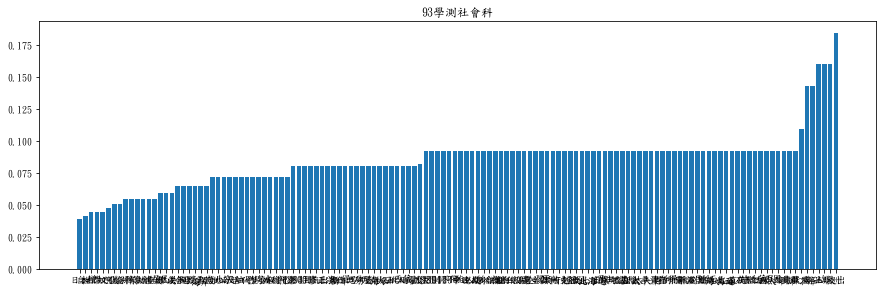

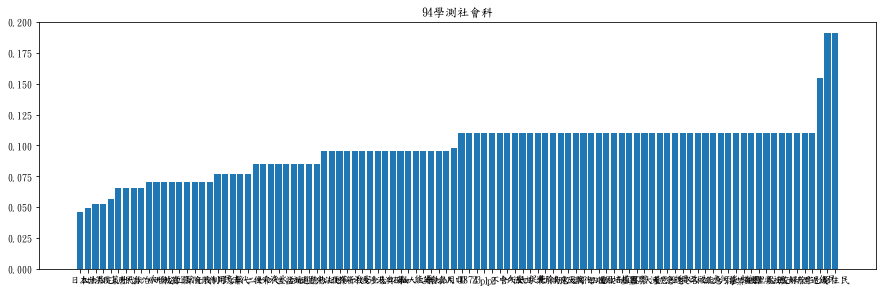

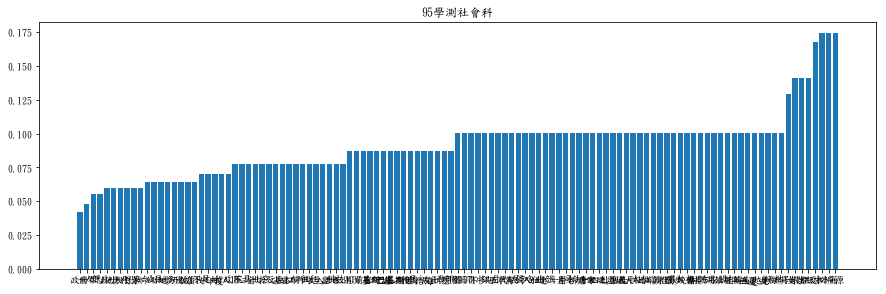

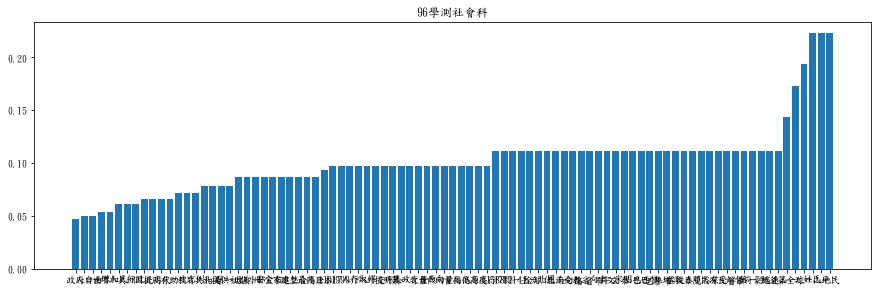

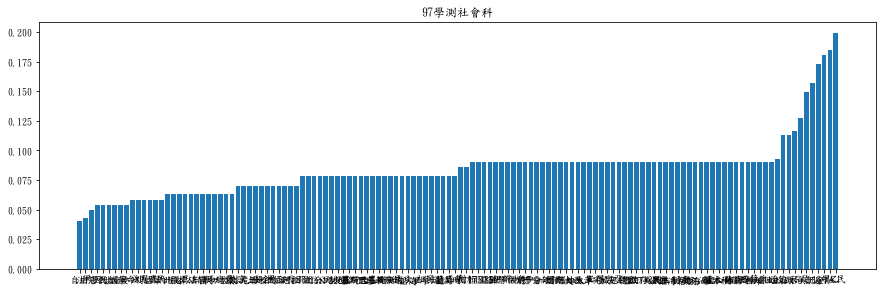

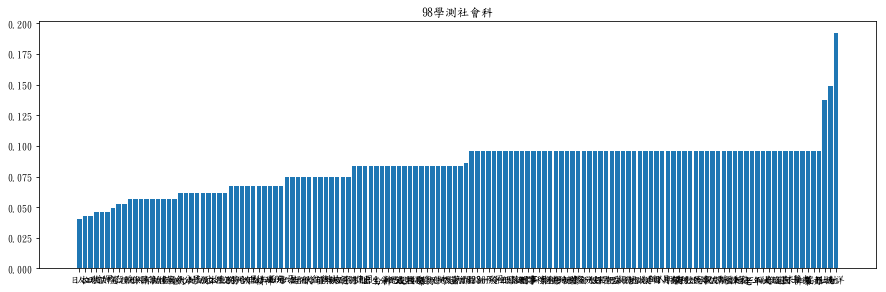

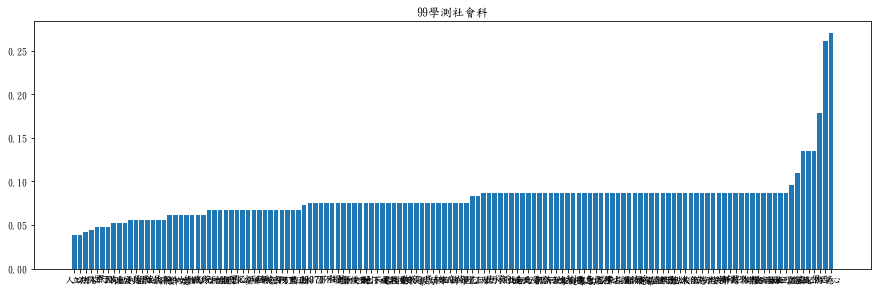

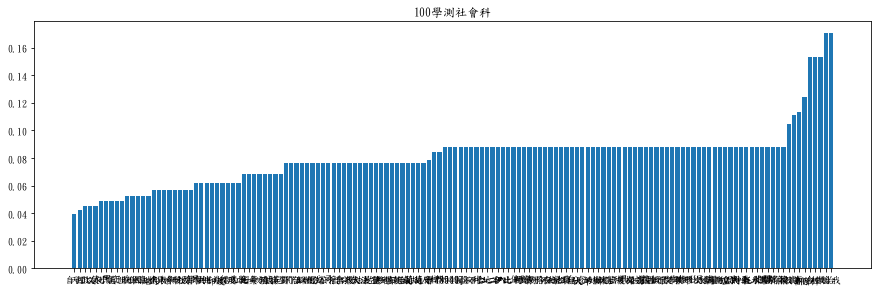

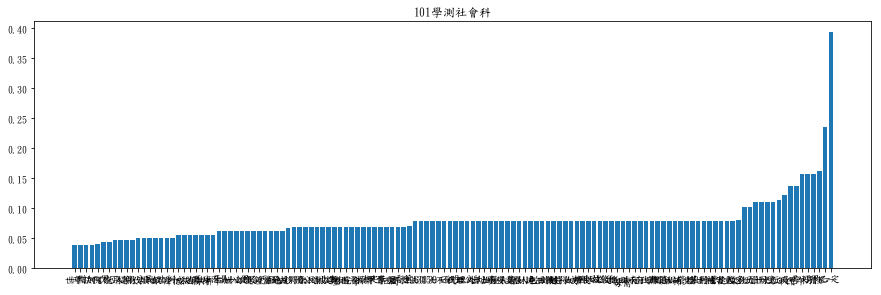

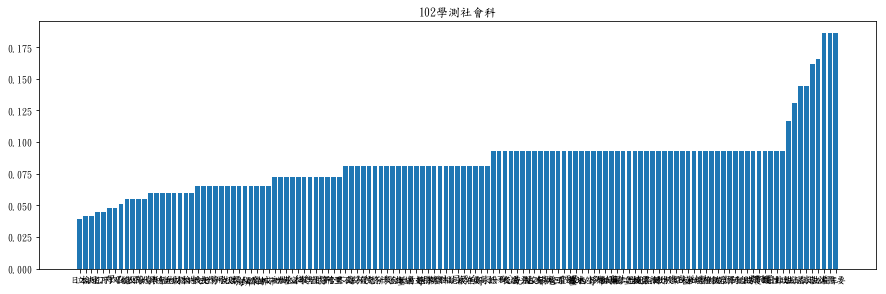

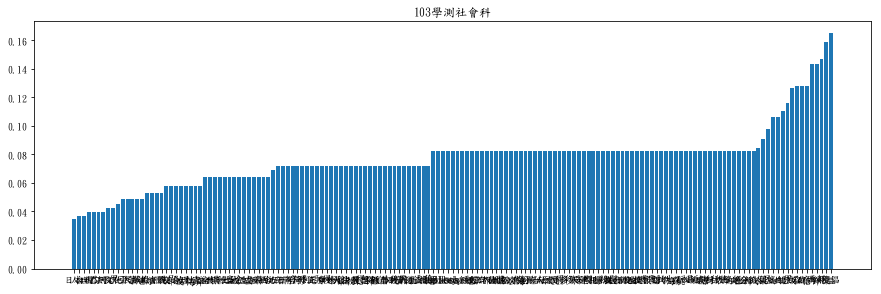

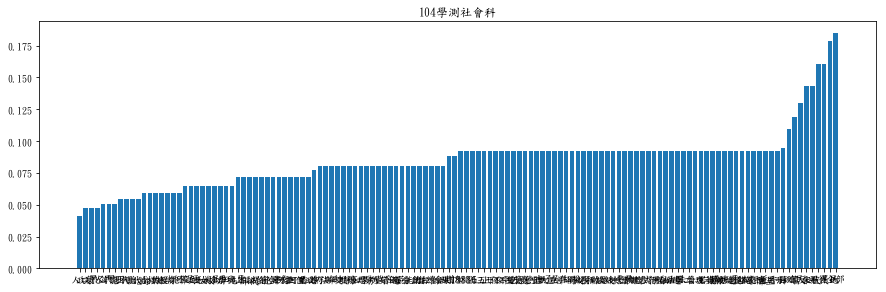

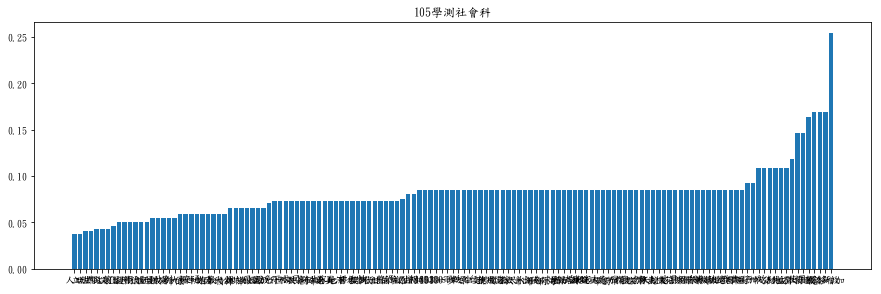

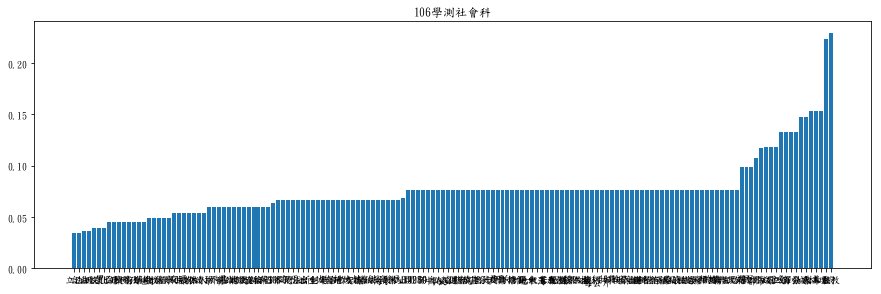

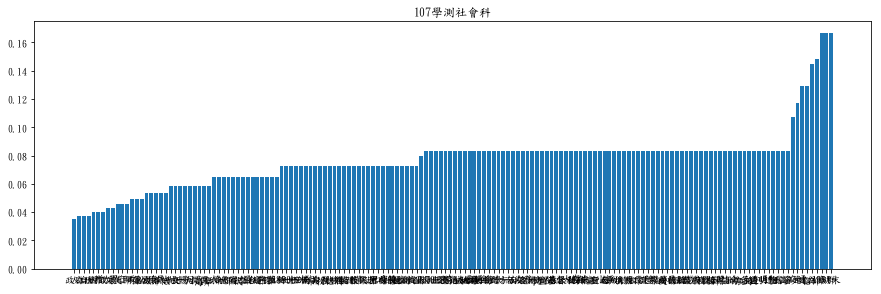

In [62]:
for index,ele in enumerate(ls):
    ordered_dic=OrderedDict(ls[index])
    plt.subplot(211)
    xticks = np.arange(len(ordered_dic)) + 1
    plt.bar(xticks, ordered_dic.values(), align='center')
    plt.xticks(xticks, list(ordered_dic.keys()))
    plt.title(str(93+index)+"學測社會科")
    plt.show()